# 🛩 Airline Analysis

In this project, I'll take on the role of a Data Scientist that works for a travel agency and needs to know the ins and outs of airline prices for our clients. I want to make sure that I can find the best deal for our clients and help them to understand how airline prices change based on different factors.

I will look into my favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, I'll explore a dataset for the first time and get to know each of the features. The goal is simply to explore and get to know the data using whatever methods come to mind.

### Loading Data & Data Summary

In [4]:
import pandas as pd
import numpy as np

# Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head(10))

# data summary
print(f'Shape of the dataframe = {flight.shape}')
print(f'The dataset has {flight.shape[0]} rows and {flight.shape[1]} columns')

# Checking for any null values
col_is_null = flight.isnull().sum()
print(f'Columns with their corresponding count of null values :{col_is_null}')
# No null values found

# Checking data type of every column
print(flight.dtypes)

# Checking the 7 point stats for the dataset
flight.describe()

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   
5   2076         196      0           Yes                    Yes   
6   1100         214      0            No                    Yes   
7   2012         200      0           Yes                    Yes   
8   1055         203      0            No                    Yes   
9   1123         204      0            No                     No   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No     

,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


In [5]:
# The mean of the miles is higher than the median while Passengers, Delay, First Class Price and Hours are below the median.

# These features prima facie seem to have outliers

# Uni-variate Analysis

We are going to look at individual variables for a better inspection

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?
   
2. What do coach ticket prices for flights over 8 hrs long look like? What are the high, low, and average prices for 8-hour-long flights? Does a \$500 ticket seem more reasonable than before?
   
3. How are flight delay times distributed? Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

__Note__: From the `.describe()` results, delays have a mean value of 13 mins, with a maximum of 1560 mins, which is an extreme outlier and disorients our plot. We can look at a delay plot with delays < 500 mins. Check the delay boxplot to see the outliers

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


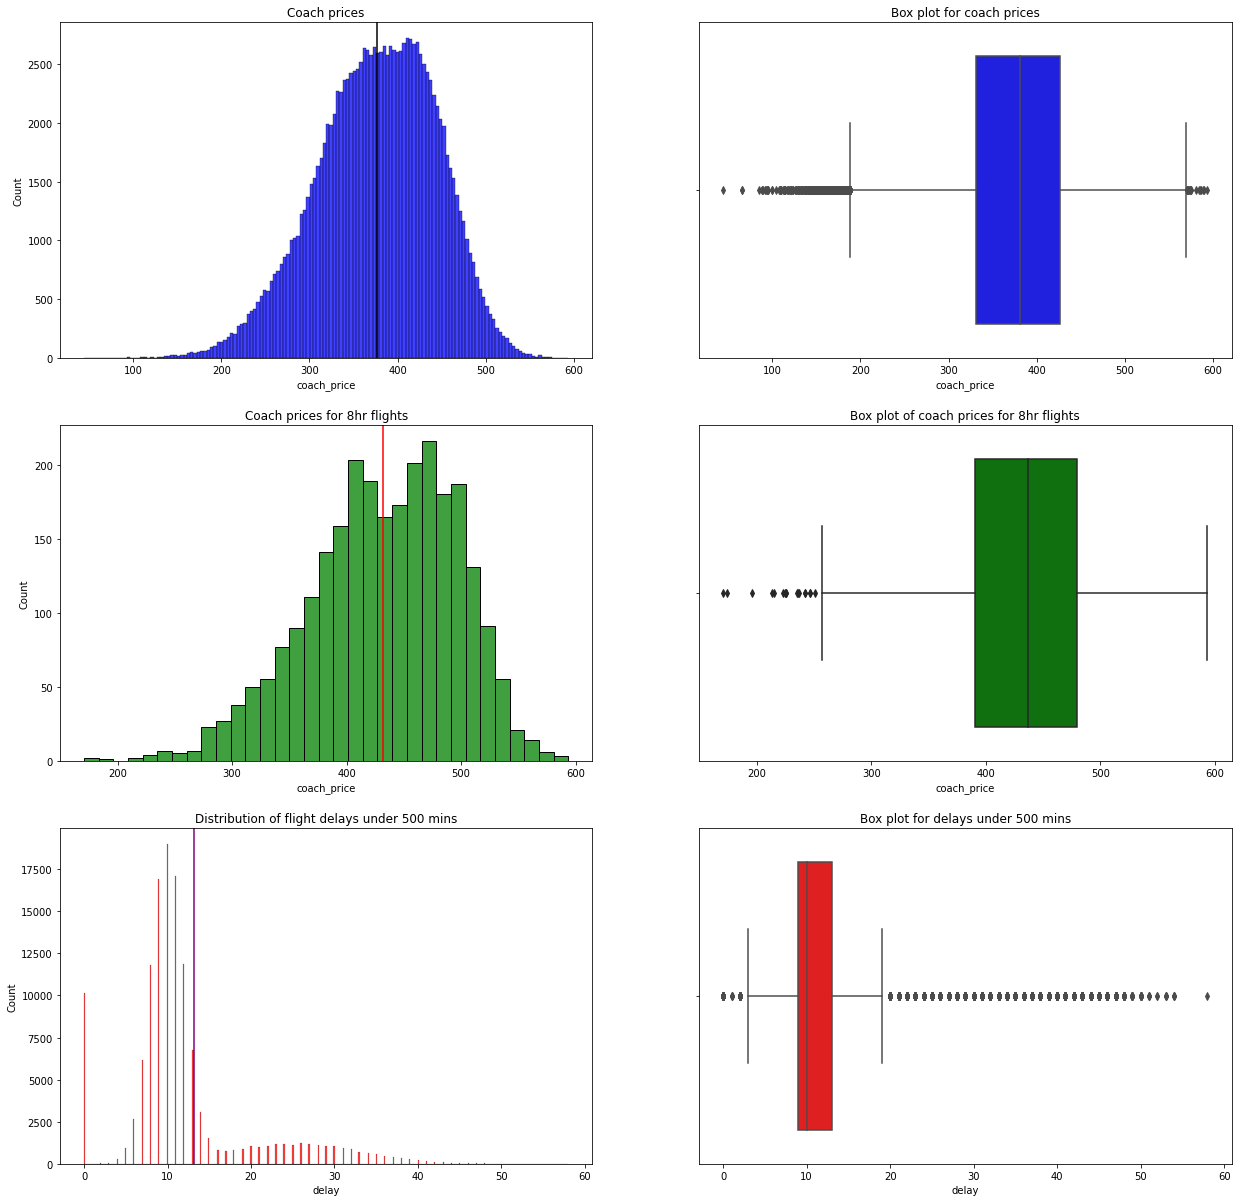

<Figure size 432x288 with 0 Axes>

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(21,21))
#subplot 1: Coach prices
plt.subplot(3,2,1)
sns.histplot(flight.coach_price, color = 'blue')
plt.axvline(flight.coach_price.mean(),color='black')
plt.title('Coach prices')

# subplot 2: Boxplot for coach prices
plt.subplot(3,2,2)
sns.boxplot(flight['coach_price'], color = 'blue')
plt.title('Box plot for coach prices')

# Subplot 3: Coach prices for 8hr flights
plt.subplot(3,2,3)
sns.histplot(flight.coach_price[flight.hours == 8], color = 'green')
hr_mean = np.mean(flight.coach_price[flight.hours == 8])
plt.axvline(hr_mean,color='red')
plt.title('Coach prices for 8hr flights')

# Subplot 4: Coach prices for 8hr long flights
plt.subplot(3,2,4)
sns.boxplot(flight.coach_price[flight.hours == 8], color = 'green')
plt.title('Box plot of coach prices for 8hr flights')

#subplot 5: boxplot for coach prices of 8hr flights
plt.subplot(3,2,5)
sns.histplot(flight.delay[flight.delay <= 500], color = 'red')
plt.axvline(flight.delay.mean(), color = 'purple')
plt.title('Distribution of flight delays under 500 mins')

# Subplot 6: Box plot for flight delays
plt.subplot(3,2,6)
sns.boxplot(flight.delay[flight.delay <= 500], color = 'red')
plt.title('Box plot for delays under 500 mins')

plt.show()
plt.clf()

## Bivariate Analysis

1. Let's explore the relationship between coach and first-class prices of each flight. Do flights with higher coach prices always have higher first-class prices as well?
2. What about the relationship between coach prices and inflight features - inflight mean, entertainment and WiFi? Which features are associated with the highest increase in price?
3. How does the number of passengers change in relation to the length of flights?

<Figure size 720x576 with 0 Axes>

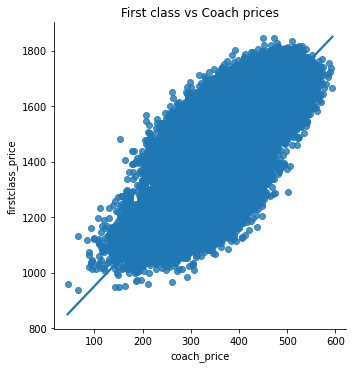

<Figure size 432x288 with 0 Axes>

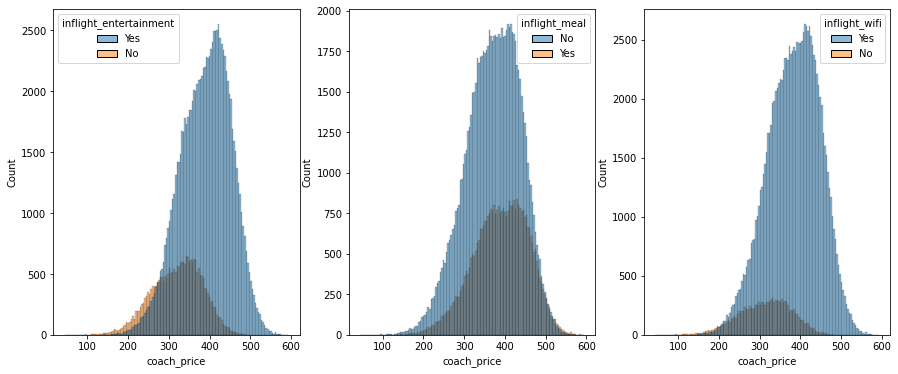

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

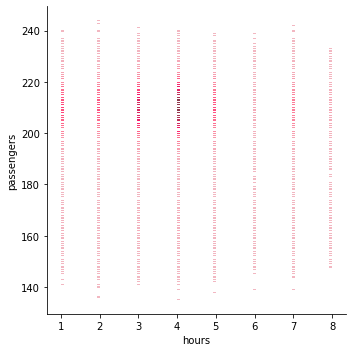

In [17]:
# Scatterplot: first class prices vs coach regression model
plt.figure(figsize=(10,8))
sns.lmplot(data = flight, x= 'coach_price', y= 'firstclass_price')
plt.title('First class vs Coach prices')

plt.show()
plt.clf()

# Histogram: Coach prices vs inflight features scatter plot with hues for features
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.histplot(data = flight, x=flight.coach_price, hue = 'inflight_entertainment')

plt.subplot(1,3,2)
sns.histplot(data = flight, x=flight.coach_price, hue = 'inflight_meal')

plt.subplot(1,3,3)
sns.histplot(data = flight, x=flight.coach_price, hue = 'inflight_wifi')

plt.show()
plt.clf()

# Displot: No of passengers vs flight length
plt.figure(figsize=(10,8))
sns.displot(data = flight, y = 'passengers', x = 'hours', color='pink')
plt.show()

## Multivariate Analysis
1. We are going to analyse the relationship between coach and first-class prices on weekends compared to weekdays
2. How do coach prices differ for redeyes vs non-redeyes on each day of the week?
3. 

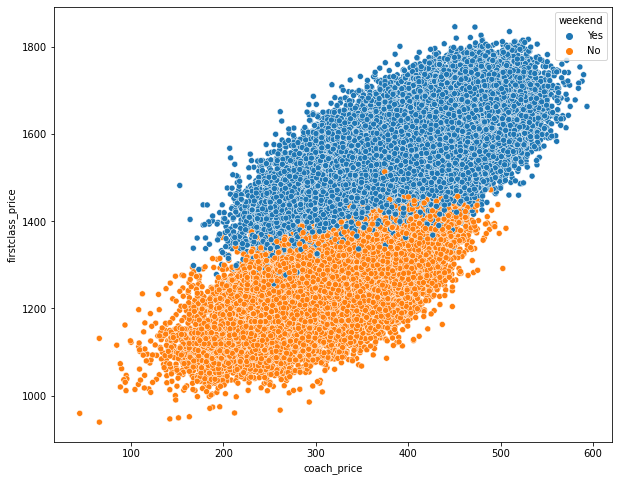

<Figure size 432x288 with 0 Axes>

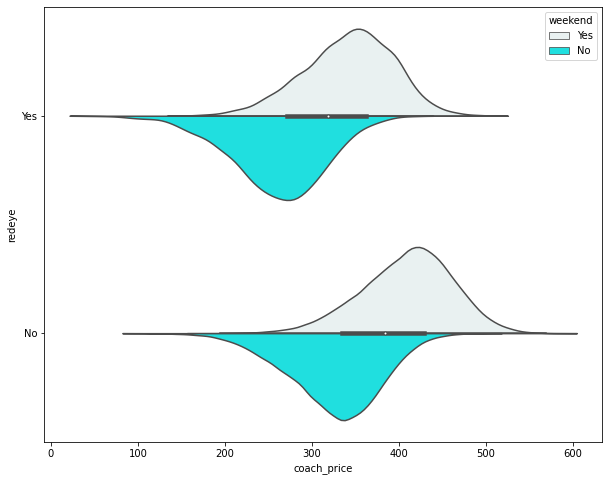

<Figure size 432x288 with 0 Axes>

In [29]:
# coach prices vs first-class on weekends vs weekdays
plt.figure(figsize=(10,8))
sns.scatterplot(data = flight, y = 'firstclass_price', x = 'coach_price', hue='weekend')
plt.show()
plt.clf()

# coach prices variation in overnight flights over the week
plt.figure(figsize=(10,8))
sns.violinplot(data = flight, y = 'redeye', x = 'coach_price', hue='weekend', split = True , color='aqua')
plt.show()
plt.clf()